In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from rdkit import Chem

#### Author: Grace Patlewicz
#### Last modified 26 September 2022

#### Import relevant libraries for data analysis and chemical structure processing
#### Analysis of the LRI and ELSIE datasets relative to TTC

In [2]:
from rdkit.Chem import Draw

In [3]:
from rdkit.Chem import AllChem
from rdkit import DataStructs

In [4]:
#fp1 = AllChem.GetMorganFingerprintAsBitVect(m1,2,nBits=1024)
#fp2 = AllChem.GetMorganFingerprintAsBitVect(m2,2,nBits=1024)

In [5]:
import os

In [6]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
interim_dir = TOP + 'data/interim/'
processed_dir = TOP + 'data/processed/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

#### Importing of relevant datasets

In [7]:
all_tps = pd.read_csv(processed_dir+'all_tps_4UMAP.csv')

In [8]:
all_tps.shape

(50291, 731)

In [9]:
all_tps

,Unnamed: 0,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_group_III,atom:element_metal_metalloid,atom:element_metal_poor_metal,atom:element_metal_transistion_metal,atom:element_noble_gas,bond:C#N_cyano_acylcyanide,bond:C#N_cyano_cyanamide,...,ring:polycycle_spiro_[2.2]pentane,ring:polycycle_spiro_[2.5]octane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,ring:polycycle_tricyclo_[3.7.7]bullvalene,ring:polycycle_tricyclo_[3.7.7]semibullvalene,ring:polycycle_tricyclo_adamantane,ring:polycycle_tricyclo_benzvalene,Source
0,DTXSID6020561,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,LRI
1,DTXSID9020453,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,LRI
2,DTXSID3034456,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,LRI
3,DTXSID2024242,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,LRI
4,DTXSID4032376,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,LRI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50286,Vinclozolin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MUNRO
50287,Vinyl chloride,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MUNRO
50288,Zatosetron maleate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MUNRO
50289,Zearalenone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MUNRO


In [10]:
all_tps = all_tps.set_index('Unnamed: 0')

In [11]:
#all_tps

In [12]:
import umap

In [13]:
reducer = umap.UMAP()

#### Applying the UMAP approach to the full dataset with TxP fingerprints. 

In [14]:
umap_features = reducer.fit_transform(all_tps.iloc[:,:-1].values)

/home/grace/anaconda3/envs/ttc_exclusions/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


In [15]:
umap_features.shape

(50291, 2)

In [16]:
umap_df=pd.concat([pd.DataFrame(umap_features, index = all_tps.index, columns = ['umap_x', 'umap_y']), all_tps.iloc[:,-1]],axis =1)

In [18]:
umap_df

,umap_x,umap_y,Source
Unnamed: 0,,,
DTXSID6020561,6.810693,-15.414203,LRI
DTXSID9020453,6.810782,-15.414332,LRI
DTXSID3034456,9.236086,4.908449,LRI
DTXSID2024242,4.994772,13.935493,LRI
DTXSID4032376,-5.053402,2.232328,LRI
...,...,...,...
Vinclozolin,6.397986,-3.437377,MUNRO
Vinyl chloride,-7.651869,-1.748535,MUNRO
Zatosetron maleate,4.002101,0.132564,MUNRO


In [19]:
umap_df['alpha'] = np.where(umap_df.Source == 'LRI', 0.3,1)

Figure 4: UMAP 2D scatterplot based on ToxPrint fingerprints colour coded by dataset

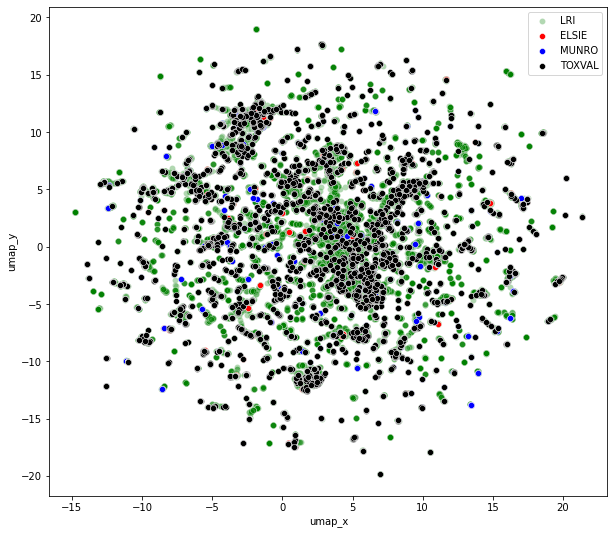

In [22]:
fig, ax = plt.subplots(figsize = (10,9))

colors = {'ELSIE':'red','LRI':'green', 'MUNRO': 'blue', 'TOXVAL' : 'black'}
umap_df['alpha'] = np.where(umap_df.Source == 'LRI', 0.3,1)
alphas = umap_df.alpha.sort_values().unique()
#grouped = tsne_df.groupby('Source')
#for key, group in grouped:
#    group.plot(ax=ax, kind='scatter', x='tsne_x', y='tsne_y', alpha = alphas[0], label=key, color=colors[key])
ax = sns.scatterplot(x="umap_x", y="umap_y",
                     data=umap_df[umap_df.Source == 'LRI'], alpha=0.3, label = 'LRI', color = colors['LRI'])
ax = sns.scatterplot(x="umap_x", y="umap_y",
                    data=umap_df[umap_df.Source == 'ELSIE'], alpha=1, label = 'ELSIE', color = colors['ELSIE'])
ax = sns.scatterplot(x="umap_x", y="umap_y",
                     data=umap_df[umap_df.Source == 'MUNRO'], alpha=1, label = 'MUNRO', color = colors['MUNRO'])
ax = sns.scatterplot(x="umap_x", y="umap_y",
                     data=umap_df[umap_df.Source == 'TOXVAL'], alpha=1, label = 'TOXVAL', color = colors['TOXVAL'])                 
#plt.title('2D Visualisation of the ELSIE vs LRI Landscape')
plt.savefig(figures_dir+'TxP_2D_UMAP_Landscape_150822.png', dpi = 300)

In [31]:
umap_df.to_csv(processed_dir+'TxP_UMAP_df.csv')

#### Checking overlap in substances between datasets

In [7]:
lri = pd.read_csv(raw_dir+'LRI_TTC_updated_180719.csv')

In [8]:
lri.head()
lri_mols = {k:Chem.MolFromSmiles(v) for k,v in zip(lri['DTXSID'], lri['smiles'])}


RDKit WARNING: [11:14:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:14:37] WARNING: not removing hydrogen atom without neighbors
[11:14:37] WARNING: not removing hydrogen atom without neighbors
[11:14:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:14:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:14:38] WARNING: not removing hydrogen atom without neighbors
[11:14:38] WARNING: not removing hydrogen atom without neighbors
[11:14:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:14:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:14:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:14:38] WARNING: not removing hydrogen atom without neighbors
[11:14:38] WARNING: not removing hydrogen atom without neighbors
[11:14:38] WARNING: not removing hydrogen atom without neighbors
[11:14:38] WARNING: not removing hydrogen atom wit

In [9]:
lri = {k: Chem.MolToInchiKey(v) for k,v in lri_mols.items() if v is not None}
lri_df = pd.DataFrame(list(lri.items()), columns = ['dtxsid', 'InChI_Key'])

In [10]:
lri_df['Source'] = 'LRI'

In [11]:
lri_df

,dtxsid,InChI_Key,Source
0,DTXSID6020561,DFBKLUNHFCTMDC-UHFFFAOYSA-N,LRI
1,DTXSID9020453,DFBKLUNHFCTMDC-UHFFFAOYSA-N,LRI
2,DTXSID3034456,QMTNOLKHSWIQBE-UHFFFAOYSA-N,LRI
3,DTXSID2024242,RMOGWMIKYWRTKW-UHFFFAOYSA-N,LRI
4,DTXSID4032376,JLYFCTQDENRSOL-UHFFFAOYSA-N,LRI
...,...,...,...
45032,DTXSID6023864,RSMUVYRMZCOLBH-UHFFFAOYSA-N,LRI
45033,DTXSID9022360,ISAVYTVYFVQUDY-UHFFFAOYSA-N,LRI
45034,DTXSID4034940,RBSXHDIPCIWOMG-UHFFFAOYSA-N,LRI
45035,DTXSID7023980,VJYIFXVZLXQVHO-UHFFFAOYSA-N,LRI


In [12]:
lri_df = lri_df.drop_duplicates(subset = ['InChI_Key'])

In [21]:
lri_df[lri_df['dtxsid'] == 'DTXSID2020139']

,dtxsid,InChI_Key,Source
315,DTXSID2020139,FMMWHPNWAFZXNH-UHFFFAOYSA-N,LRI


In [15]:
toxval = pd.read_excel(external_dir+'ToxVal_SMI.xlsx', sheet_name = 'Main Data_2')

In [16]:
toxval_mols = {k:Chem.MolFromSmiles(v) for k,v in zip(toxval['DTXSID'], toxval['SMILES'])}

RDKit ERROR: [11:16:14] Explicit valence for atom # 2 O, 3, is greater than permitted
[11:16:14] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [11:16:15] Explicit valence for atom # 9 N, 4, is greater than permitted
[11:16:15] Explicit valence for atom # 9 N, 4, is greater than permitted
RDKit WARNING: [11:16:15] WARNING: not removing hydrogen atom without neighbors
[11:16:15] WARNING: not removing hydrogen atom without neighbors


In [17]:
txval = {k: Chem.MolToInchiKey(v) for k,v in toxval_mols.items() if v is not None}
txval_df = pd.DataFrame(list(txval.items()), columns = ['dtxsid', 'InChI_Key'])

RDKit ERROR: [11:16:16] Invalid InChI prefix in generating InChI Key
[11:16:16] Invalid InChI prefix in generating InChI Key


In [18]:
txval_df = txval_df.drop_duplicates(subset = ['InChI_Key'])

In [19]:
txval_df['Source'] = 'TOXVAL'

In [22]:
txval_df[txval_df['dtxsid'] == 'DTXSID2020139']

,dtxsid,InChI_Key,Source
882,DTXSID2020139,FMMWHPNWAFZXNH-UHFFFAOYSA-N,TOXVAL


In [23]:
munro = pd.read_csv(external_dir+'Munro_InChI.csv')

In [24]:
munro = munro[['NAME_Munro_1996','InChI_Key']]

In [25]:
munro['Source'] = 'MUNRO'

In [26]:
munro.columns = ['dtxsid', 'InChI_Key', 'Source']

In [27]:
munro = munro.drop_duplicates(subset = ['InChI_Key'])

In [29]:
munro[munro['InChI_Key'] == 'FMMWHPNWAFZXNH-UHFFFAOYSA-N']

,dtxsid,InChI_Key,Source


In [54]:
elsie = pd.read_csv(raw_dir+'elsie_290322.smi', sep = '\t', names = ['SMILES', 'DTXSID'])

In [55]:
elsie = elsie[elsie['SMILES'] != ' ']

In [57]:
elsie_txps = pd.read_csv(processed_dir+'output_elsie290322.txt', sep = ';')

In [58]:
elsie_txps = elsie_txps[elsie_txps['M_CORINA_SYMPHONY_ERRORS_[STRING]'] == 'No errors']

In [60]:
elsie_txps = elsie_txps.set_index('M_NAME')

In [63]:
elsie = elsie.set_index('DTXSID')

In [65]:
elsie = elsie.loc[elsie_txps.index,:].reset_index()

In [110]:
#elsie

In [67]:
elsie_mols = {k:Chem.MolFromSmiles(v) for k,v in zip(elsie['M_NAME'], elsie['SMILES'])}

In [73]:
d = {k: Chem.MolToInchiKey(v) for k,v in elsie_mols.items()}
elsie_df = pd.DataFrame(list(d.items()), columns = ['dtxsid', 'InChI_Key'])

In [113]:
elsie_df['Source'] = 'ELSIE'

In [152]:
all_df = pd.concat([elsie_df, munro,txval_df, lri_df])

In [158]:
all_df.InChI_Key.nunique()

46197

In [190]:
all_df

,dtxsid,InChI_Key,Source
0,DTXSID2066561,WPMYUUITDBHVQZ-UHFFFAOYSA-N,ELSIE
1,DTXSID3067815,MQRCHVBRBGNZGJ-UHFFFAOYSA-N,ELSIE
2,DTXSID3026564,FRQDZJMEHSJOPU-UHFFFAOYSA-N,ELSIE
3,DTXSID4024696,SOGAXMICEFXMKE-UHFFFAOYSA-N,ELSIE
4,DTXSID9021847,USIUVYZYUHIAEV-UHFFFAOYSA-N,ELSIE
...,...,...,...
45032,DTXSID6023864,RSMUVYRMZCOLBH-UHFFFAOYSA-N,LRI
45033,DTXSID9022360,ISAVYTVYFVQUDY-UHFFFAOYSA-N,LRI
45034,DTXSID4034940,RBSXHDIPCIWOMG-UHFFFAOYSA-N,LRI
45035,DTXSID7023980,VJYIFXVZLXQVHO-UHFFFAOYSA-N,LRI


In [194]:

all_df_grp = all_df.groupby('InChI_Key')['Source'].apply(lambda x: x.tolist()).reset_index()

In [195]:
all_df_grp

,InChI_Key,Source
0,,[TOXVAL]
1,AAADKYXUTOBAGS-UHFFFAOYSA-N,[LRI]
2,AAAFRLJCFYKQPO-UHFFFAOYSA-N,[LRI]
3,AAAHTTDMVMAHMO-UHFFFAOYSA-N,[LRI]
4,AAAIOLZUQZJCPR-FPODKLOTSA-N,[LRI]
...,...,...
46192,ZZYHCCDMBJTROG-UHFFFAOYSA-N,[LRI]
46193,ZZYSLNWGKKDOML-UHFFFAOYSA-N,"[TOXVAL, LRI]"
46194,ZZYXNRREDYWPLN-UHFFFAOYSA-N,[LRI]
46195,ZZZRUAITSXLWBH-UHFFFAOYSA-N,[LRI]


In [200]:
all_df_grp['Count'] = all_df_grp['Source'].apply(lambda x: len(x))

In [201]:
all_df_grp[all_df_grp['Count'] ==4].shape

(47, 3)

In [202]:
all_df_grp[all_df_grp['Count'] ==2]

,InChI_Key,Source,Count
60,AAXBKJXGVXNSHI-UHFFFAOYSA-N,"[TOXVAL, LRI]",2
64,AAYYTNPAPOADFH-SOFGYWHQSA-N,"[TOXVAL, LRI]",2
68,ABAMRJVWDHJBTI-UHFFFAOYSA-N,"[TOXVAL, LRI]",2
72,ABBQHOQBGMUPJH-UHFFFAOYSA-M,"[TOXVAL, LRI]",2
77,ABDKAPXRBAPSQN-UHFFFAOYSA-N,"[TOXVAL, LRI]",2
...,...,...,...
46140,ZZEYCGJAYIHIAZ-UHFFFAOYSA-N,"[TOXVAL, LRI]",2
46164,ZZMVLMVFYMGSMY-UHFFFAOYSA-N,"[TOXVAL, LRI]",2
46176,ZZTCCAPMZLDHFM-UHFFFAOYSA-N,"[TOXVAL, LRI]",2
46187,ZZVUWRFHKOJYTH-UHFFFAOYSA-N,"[MUNRO, LRI]",2


In [203]:
all_df_grp['Source'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[LRI]                          41450
[TOXVAL, LRI]                   2789
[TOXVAL]                         991
[MUNRO, TOXVAL, LRI]             303
[ELSIE, TOXVAL, LRI]             185
[MUNRO, LRI]                     149
[ELSIE, LRI]                     100
[MUNRO]                           85
[ELSIE]                           71
[ELSIE, MUNRO, TOXVAL, LRI]       47
[MUNRO, TOXVAL]                   16
[ELSIE, TOXVAL]                    8
[ELSIE, MUNRO, LRI]                3
Name: Source, dtype: int64

In [118]:
from matplotlib_venn import venn3

In [121]:
elsie_ids = set(elsie_df['InChI_Key'])
munro_ids = set(munro['InChI_Key'])
lri_ids = set(lri_df['InChI_Key'])
txval_ids = set(txval_df['InChI_Key'])

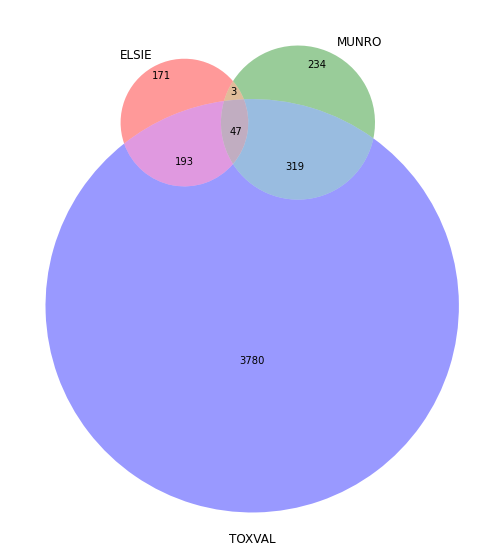

In [319]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
v = venn3([elsie_ids, munro_ids, txval_ids], ('ELSIE', 'MUNRO', 'TOXVAL'))

In [204]:
all_df_grp['Source_str'] = [str(e) for e in all_df_grp['Source']]

In [207]:
all_df_grp[all_df_grp['Source_str'] == "['ELSIE']"].InChI_Key.tolist()

['AKTGKEBIBGSCLD-UHFFFAOYSA-N',
 'AZSKHRTUXHLAHS-UHFFFAOYSA-N',
 'BANLNYYTSYHBAP-UHFFFAOYSA-N',
 'BATDEVCTYREDAX-UHFFFAOYSA-N',
 'BCZBHKFELJMPTK-UHFFFAOYSA-N',
 'BEIOEBMXPVYLRY-UHFFFAOYSA-N',
 'CGKUZZXPPXLFDW-UHFFFAOYSA-N',
 'CHJMFFKHPHCQIJ-UHFFFAOYSA-L',
 'CPELXLSAUQHCOX-UHFFFAOYSA-M',
 'DGBVTHKFRCRYJZ-UHFFFAOYSA-N',
 'DQBHJILNHNRDTM-UHFFFAOYSA-N',
 'FPXFCDUVTBDSHF-UHFFFAOYSA-N',
 'GEOCFEWLANXFHX-UHFFFAOYSA-N',
 'GQIGHOCYKUBBOE-UHFFFAOYSA-N',
 'GUDSEWUOWPVZPC-UHFFFAOYSA-N',
 'HEIBWPHLFHWDAX-UHFFFAOYSA-N',
 'HERSSAVMHCMYSQ-UHFFFAOYSA-N',
 'HIPPBUJQSIICJN-UHFFFAOYSA-N',
 'HKQBGDOVZRQTMC-UHFFFAOYSA-N',
 'HQJRTBCIHIBGOB-UHFFFAOYSA-N',
 'HSNQKJVQUFYBBY-UHFFFAOYSA-N',
 'HUYDCTLGGLCUTE-HJWRWDBZSA-N',
 'IICRGUKQYYOPIG-UHFFFAOYSA-N',
 'ILNDSSCEZZFNGE-UHFFFAOYSA-N',
 'IXDGHAZCSMVIFX-UHFFFAOYSA-N',
 'IXKVYSRDIVLASR-UHFFFAOYSA-N',
 'JESOOKQYHPPUDI-UHFFFAOYSA-N',
 'JJQCWPWUHZFKBN-UHFFFAOYSA-N',
 'JOWXNCPELQZFHF-UHFFFAOYSA-N',
 'JSEQNGYLWKBMJI-UHFFFAOYSA-N',
 'KRHYYFGTRYWZRS-UHFFFAOYSA-M',
 'LSWRBV

In [214]:
elsie_df

,dtxsid,InChI_Key,Source
0,DTXSID2066561,WPMYUUITDBHVQZ-UHFFFAOYSA-N,ELSIE
1,DTXSID3067815,MQRCHVBRBGNZGJ-UHFFFAOYSA-N,ELSIE
2,DTXSID3026564,FRQDZJMEHSJOPU-UHFFFAOYSA-N,ELSIE
3,DTXSID4024696,SOGAXMICEFXMKE-UHFFFAOYSA-N,ELSIE
4,DTXSID9021847,USIUVYZYUHIAEV-UHFFFAOYSA-N,ELSIE
...,...,...,...
409,DTXSID5042328,JMFYZMAVUHNCPW-UHFFFAOYSA-N,ELSIE
410,DTXSID40864845,BBITXNWQALLODC-UHFFFAOYSA-N,ELSIE
411,DTXSID4027286,NOPFSRXAKWQILS-UHFFFAOYSA-N,ELSIE
412,DTXSID0038883,PRWJPWSKLXYEPD-UHFFFAOYSA-N,ELSIE


In [220]:
elsie_71 = elsie_df[elsie_df['InChI_Key'].isin(all_df_grp[all_df_grp['Source_str'] == "['ELSIE']"].InChI_Key.tolist())]['dtxsid'].tolist()

In [212]:
elsie_physhem = pd.read_excel(raw_dir+'CCD-Batch-Search_2022-03-28_09_38_13.xlsx', sheet_name = 'Main Data')

In [217]:
elsie_physhem = elsie_physhem[elsie_physhem['INPUT'].isin(elsie_df.dtxsid)]

In [221]:
elsie_physhem['elsie_71'] = elsie_physhem['INPUT'].apply(lambda x: 1 if x in elsie_71 else 0)

/tmp/ipykernel_122779/1765500215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elsie_physhem['elsie_71'] = elsie_physhem['INPUT'].apply(lambda x: 1 if x in elsie_71 else 0)


In [244]:
logp = elsie_physhem[elsie_physhem['OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED'] != ' ']['OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED'].astype(float)

In [246]:
elsie_physhem = elsie_physhem[elsie_physhem['OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED'] != ' ']

In [312]:
#lsie_physhem

In [310]:
from rdkit.Chem import Descriptors

In [313]:
elsie_physhem['MW'] = [Descriptors.MolWt(Chem.MolFromSmiles(e)) for e in elsie_physhem['SMILES']]

/tmp/ipykernel_122779/883937875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elsie_physhem['MW'] = [Descriptors.MolWt(Chem.MolFromSmiles(e)) for e in elsie_physhem['SMILES']]


In [314]:
#elsie_physhem

,INPUT,FOUND_BY,DTXSID,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,SMILES,QSAR_READY_SMILES,ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE*SEC_OPERA_PRED,...,OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA_PRED,SOIL_ADSORPTION_COEFFICIENT_KOC_L/KG_OPERA_PRED,OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED,MELTING_POINT_DEGC_OPERA_PRED,OPERA_PKAA_OPERA_PRED,OPERA_PKAB_OPERA_PRED,VAPOR_PRESSURE_MMHG_OPERA_PRED,WATER_SOLUBILITY_MOL/L_OPERA_PRED,elsie_71,MW
0,DTXSID2066561,DSSTox_Substance_Id,DTXSID2066561,Fenozan,20170-32-5,WPMYUUITDBHVQZ-UHFFFAOYSA-N,"3-(3,5-Di-tert-butyl-4-hydroxyphenyl)propanoic...",CC(C)(C)C1=CC(CCC(O)=O)=CC(=C1O)C(C)(C)C,CC(C)(C)C1=CC(CCC(O)=O)=CC(=C1O)C(C)(C)C,0.0,...,9.01902,2735.89,4.57702,155.655,,,0.0,0.000058,0,278.392
2,DTXSID3026564,DSSTox_Substance_Id,DTXSID3026564,Triethylene glycol bis(2-ethylhexanoate),94-28-0,FRQDZJMEHSJOPU-UHFFFAOYSA-N,"[(Ethane-1,2-diyl)bis(oxy)ethane-2,1-diyl] bis...",CCCCC(CC)C(=O)OCCOCCOCCOC(=O)C(CC)CCCC,CCCCC(CC)C(=O)OCCOCCOCCOC(=O)C(CC)CCCC,0.0,...,10.8596,13541.0,3.59995,-20.3986,,,0.0,0.000039,0,402.572
3,DTXSID4024696,DSSTox_Substance_Id,DTXSID4024696,Butyl methacrylate,97-88-1,SOGAXMICEFXMKE-UHFFFAOYSA-N,Butyl 2-methylprop-2-enoate,CCCCOC(=O)C(C)=C,CCCCOC(=O)C(C)=C,0.0,...,4.13212,70.2421,2.8773,-74.8169,,,2.12457,0.005684,0,142.198
4,DTXSID9021847,DSSTox_Substance_Id,DTXSID9021847,Diphenyl oxide,101-84-8,USIUVYZYUHIAEV-UHFFFAOYSA-N,"1,1'-Oxydibenzene",O(C1=CC=CC=C1)C1=CC=CC=C1,O(C1=CC=CC=C1)C1=CC=CC=C1,0.0,...,6.11077,1950.01,4.13044,27.1481,,,0.019946,0.000133,0,170.211
5,DTXSID50933536,DSSTox_Substance_Id,DTXSID50933536,Octacosamethylcyclotetradecasiloxane,149050-40-8,ZHDAYCIVVMINRB-UHFFFAOYSA-N,Octacosamethylcyclotetradecasiloxane,C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si...,C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si...,0.0,...,11.6921,99932.5,8.26389,-26.7167,,,0.001299,0.000022,1,1038.170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,DTXSID5042328,DSSTox_Substance_Id,DTXSID5042328,Dimethyl (p-methoxybenzylidene)malonate,7443-25-6,JMFYZMAVUHNCPW-UHFFFAOYSA-N,Dimethyl [(4-methoxyphenyl)methylidene]propane...,COC(=O)C(=CC1=CC=C(OC)C=C1)C(=O)OC,COC(=O)C(=CC1=CC=C(OC)C=C1)C(=O)OC,0.0,...,7.44486,109.767,2.43083,46.0152,,,0.000063,0.001334,0,250.250
452,DTXSID40864845,DSSTox_Substance_Id,DTXSID40864845,"4H-3,1-Benzoxazin-4-one, 2,2'-(1,4-phenylene)bis-",18600-59-4,BBITXNWQALLODC-UHFFFAOYSA-N,"2,2'-(1,4-Phenylene)di(4H-3,1-benzoxazin-4-one)",O=C1OC(=NC2=CC=CC=C12)C1=CC=C(C=C1)C1=NC2=CC=C...,O=C1OC(=NC2=CC=CC=C12)C1=CC=C(C=C1)C1=NC2=CC=C...,0.0,...,11.6937,822.378,3.06757,144.209,,,0.0,0.0,0,368.348
453,DTXSID4027286,DSSTox_Substance_Id,DTXSID4027286,1-Docosanol,661-19-8,NOPFSRXAKWQILS-UHFFFAOYSA-N,Docosan-1-ol,CCCCCCCCCCCCCCCCCCCCCCO,CCCCCCCCCCCCCCCCCCCCCCO,0.0,...,10.6873,14101.7,9.35723,72.305,,,0.0,0.0,0,326.609
454,DTXSID0038883,DSSTox_Substance_Id,DTXSID0038883,"Phenol, 4,4',4''-(1-methyl-1-propanyl-3-yliden...",1843-03-4,PRWJPWSKLXYEPD-UHFFFAOYSA-N,"4,4',4''-(Butane-1,1,3-triyl)tris(2-tert-butyl...",CC(CC(C1=CC(=C(O)C=C1C)C(C)(C)C)C1=CC(=C(O)C=C...,CC(CC(C1=CC(=C(O)C=C1C)C(C)(C)C)C1=CC(=C(O)C=C...,0.0,...,9.48982,129825.0,10.0003,186.464,,,0.0,0.0,0,544.820


#### 4.7 Visualisation of landscapes of the datasets through non-linear dimension reduction techniques

Figure 5: Boxplots for the ELSIE datasets showing the distribution of parameters for the unique substances relative to the remaining set

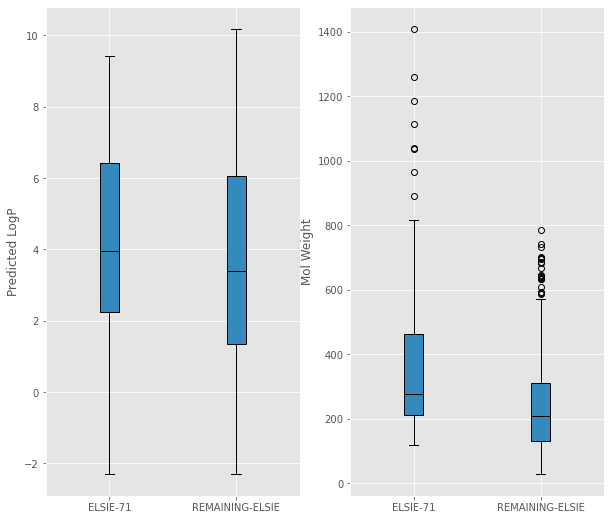

In [318]:
plt.style.use('ggplot')
f, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,9))
labels = ["ELSIE-71", "REMAINING-ELSIE"]

ax1.boxplot([elsie_physhem[elsie_physhem['elsie_71'] == 1]['OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED'], elsie_physhem[elsie_physhem['elsie_71'] == 0]['OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED']], medianprops={"color": "black", "linewidth": 1},patch_artist=True, labels = labels)
ax2.boxplot([elsie_physhem[elsie_physhem['elsie_71'] == 1]['MW'], elsie_physhem[elsie_physhem['elsie_71'] == 0]['MW']], medianprops={"color": "black", "linewidth": 1},patch_artist=True, labels = labels)

ax1.set_ylabel('Predicted LogP')
ax2.set_ylabel('Mol Weight')

plt.savefig(figures_dir+'ELSIE_Unique.png', dpi = 300);


#### ToxPrint enrichment analysis for the full dataset. Enrichments were computed for both datasets. Section 4.8 

In [335]:
import scipy.stats as stats

In [323]:
all_tps2 = all_tps.copy()

In [330]:
all_tps2.loc[:, 'Source'] = all_tps2['Source'].apply(lambda x: 1 if x == 'ELSIE' else 0)

In [332]:
all_tps2['Source'].value_counts()

0    49877
1      414
Name: Source, dtype: int64

In [333]:
all_tps2

,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_group_III,atom:element_metal_metalloid,atom:element_metal_poor_metal,atom:element_metal_transistion_metal,atom:element_noble_gas,bond:C#N_cyano_acylcyanide,bond:C#N_cyano_cyanamide,bond:C#N_cyano_cyanohydrin,...,ring:polycycle_spiro_[2.2]pentane,ring:polycycle_spiro_[2.5]octane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,ring:polycycle_tricyclo_[3.7.7]bullvalene,ring:polycycle_tricyclo_[3.7.7]semibullvalene,ring:polycycle_tricyclo_adamantane,ring:polycycle_tricyclo_benzvalene,Source
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
DTXSID6020561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID9020453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID3034456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID2024242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID4032376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vinclozolin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vinyl chloride,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zatosetron maleate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [336]:
res = []
for i, column in all_tps2.iloc[:,:729].iteritems():
    if pd.crosstab(all_tps2.iloc[:,729],column).shape == (2,2):
        a = pd.crosstab(all_tps2.iloc[:,729],column)
        tn, fn, fp, tp = a.iloc[0,0], a.iloc[0,1], a.iloc[1,0], a.iloc[1,1]
        oddsratio, pvalue = stats.fisher_exact(pd.crosstab(all_tps2.iloc[:,729],column))
        res.append([oddsratio, pvalue, i, tp])

In [337]:
def convert(lst):
    lst_df = pd.DataFrame(lst, columns = ['OR', 'p', 'ToxPrint', 'TP'])
    lst_df = lst_df.sort_values(by = ['OR', 'p', 'TP'], ascending = [False, True, False])
    
    return lst_df

In [338]:
elsie_or = convert(res)

In [339]:
elsie_or

,OR,p,ToxPrint,TP
293,inf,8.232089e-03,bond:metal_group_III_other_Al_generic,1
294,inf,8.232089e-03,bond:metal_group_III_other_Al_oxy,1
296,inf,8.232089e-03,bond:metal_group_III_other_generic_oxy,1
295,120.765133,1.639657e-02,bond:metal_group_III_other_generic,1
475,33.325535,9.701466e-08,ring:fused_PAH_acenaphthylene,6
...,...,...,...,...
595,0.000000,1.000000e+00,ring:polycycle_spiro_[2.2]pentane,0
596,0.000000,1.000000e+00,ring:polycycle_spiro_[2.5]octane,0
597,0.000000,1.000000e+00,ring:polycycle_spiro_[4.5]decane,0
598,0.000000,1.000000e+00,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,0


In [68]:
lri_or = convert(res2)

In [340]:
def enriched(mydf):
    enrich_df = mydf[(mydf['OR'] >= 3) & (mydf['TP'] >= 3) & (mydf['p'] <= 0.05)]
    enrich_df = enrich_df.sort_values(by = ['OR', 'p', 'TP'], ascending = [False, True, False])
    return enrich_df

In [341]:
elsie_enriched = enriched(elsie_or)


In [344]:
elsie_enriched.shape

(31, 4)

In [345]:
elsie_enriched

,OR,p,ToxPrint,TP
475,33.325535,9.701466e-08,ring:fused_PAH_acenaphthylene,6
482,13.537626,5.765157e-05,ring:fused_PAH_pyrene,5
298,11.262729,4.097720e-18,bond:metal_metalloid_alkylSiloxane,26
244,10.195127,1.087828e-05,bond:PO_phosphine_oxy_generic,7
309,10.030492,5.527763e-17,bond:metal_metalloid_Si_oxy,26
386,8.860221,4.355209e-13,chain:oxy-alkaneLinear_ethyleneOxide_EO2,21
310,8.614533,1.109319e-04,bond:metal_metalloid_trimethylsilane,6
387,8.150730,9.022628e-08,chain:oxy-alkaneLinear_ethyleneOxide_EO3,12
304,7.986660,8.596638e-15,bond:metal_metalloid_oxy,26
246,7.838710,2.181592e-03,bond:PO_phosphite,4


In [81]:
#elsie_enriched

In [346]:
writer = pd.ExcelWriter(processed_dir+'enrichments_ELSIE_310222.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
elsie_enriched.to_excel(writer, sheet_name = 'elsie_enriched_TxPs')


writer.save()